# Introduction

### This is jupyter notebook which involves making a neural netowrk from scratch using only python with numpy library 

### Importing Libraries

In [1]:
import numpy as np
import math

# Making A simple NN

### Making weights and biases

In [2]:
inputs=[1,2,3,4]

In [3]:
weights1=[4,3,11,1]
weights2=[7,3,10,1]
weights3=[8,3,9,1]

In [4]:
bias1=3
bias2=8
bias3=9

### Making a simple Neural Netowrk single neuron which is also
### y=mx+c

In [5]:
single_neuron_output=inputs[0]*weights1[0]+bias1
print(single_neuron_output)

7


### Making a simple NN with multiple inputs

In [6]:
multiple_inputs_output =inputs[0]*weights1[0]+inputs[1]*weights1[1]+inputs[2]*weights1[2]+bias1
print(multiple_inputs_output)

46


### Making a NN with Multiple Neurons

In [7]:
multiple_neuron_output =[inputs[0]*weights1[0]+inputs[1]*weights1[1]+inputs[2]*weights1[2]+bias1,
        inputs[0]*weights2[0]+inputs[1]*weights2[1]+inputs[2]*weights2[2]+bias2,
        inputs[0]*weights3[0]+inputs[1]*weights3[1]+inputs[2]*weights3[2]+bias3]

multiple_neuron_output

[46, 51, 50]

### Doing above step but with dot product for ease

In [8]:
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]] # redefining to make it as a matrix

biases=[6,7,8]

dot_output=np.dot(weights,inputs)+biases

print(dot_output)

[10.3   4.46 11.19]


# Adding a Neural Network Layer in it 

In [9]:
class Layer():
    def __init__(self,n_inputs,n_neurons):
        self.weights=0.10*np.random.randn(n_inputs,n_neurons)
        self.biases=np.zeros((1,n_neurons))
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

### use above class to make single layer NN

In [10]:
layer1=Layer(4,5)
layer1.forward(inputs)

print(layer1.output)

[[-0.15641422 -0.10590679 -0.36634639  1.16166356  0.43078257]]


### checking what is weights and biases are

In [11]:
layer1.weights #it is a 4 by 5 matrix

array([[ 0.01494704, -0.11365001, -0.03131023, -0.04859116,  0.2597735 ],
       [-0.16581017, -0.00875975, -0.08370398,  0.07072182, -0.1020098 ],
       [-0.02260094, -0.10507791,  0.08948847,  0.0852502 ,  0.04388856],
       [ 0.05701547,  0.08512411, -0.1090234 ,  0.20326512,  0.06084075]])

In [12]:
layer1.biases #obvious zero because np.zero is used

array([[0., 0., 0., 0., 0.]])

### adding another layer

In [13]:
layer2 = Layer(5,2)
layer2.forward(layer1.output)
print(layer2.output)

[[0.17880476 0.08642343]]


## Explaning input and output sizes:
### In a Matrix 4x5 the 4 are next layer neurons and 5 are previous neurons input

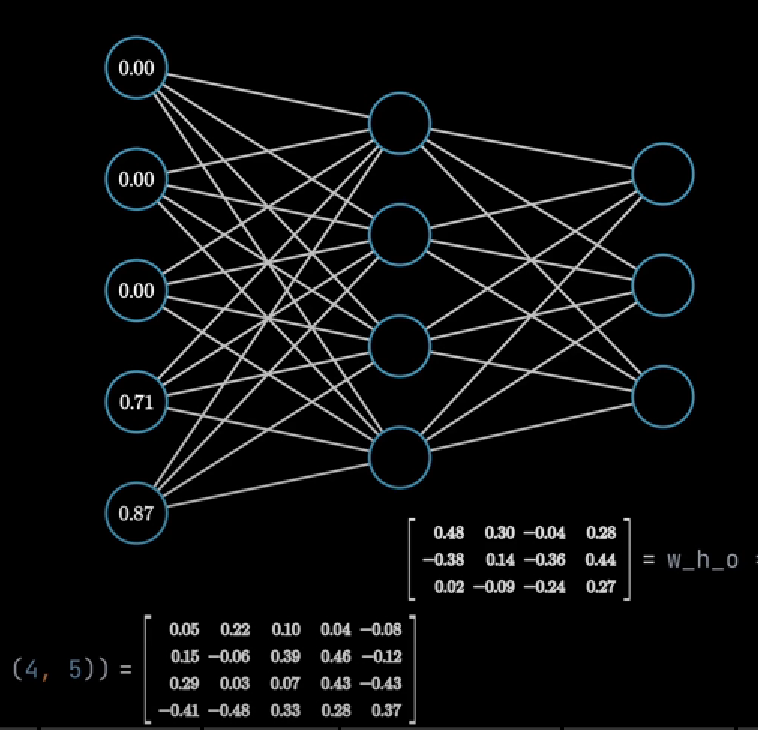

### while we asign bias 0 so it plays a unbaised role
### also in below graph bias move the line as a whole without changing its orientation
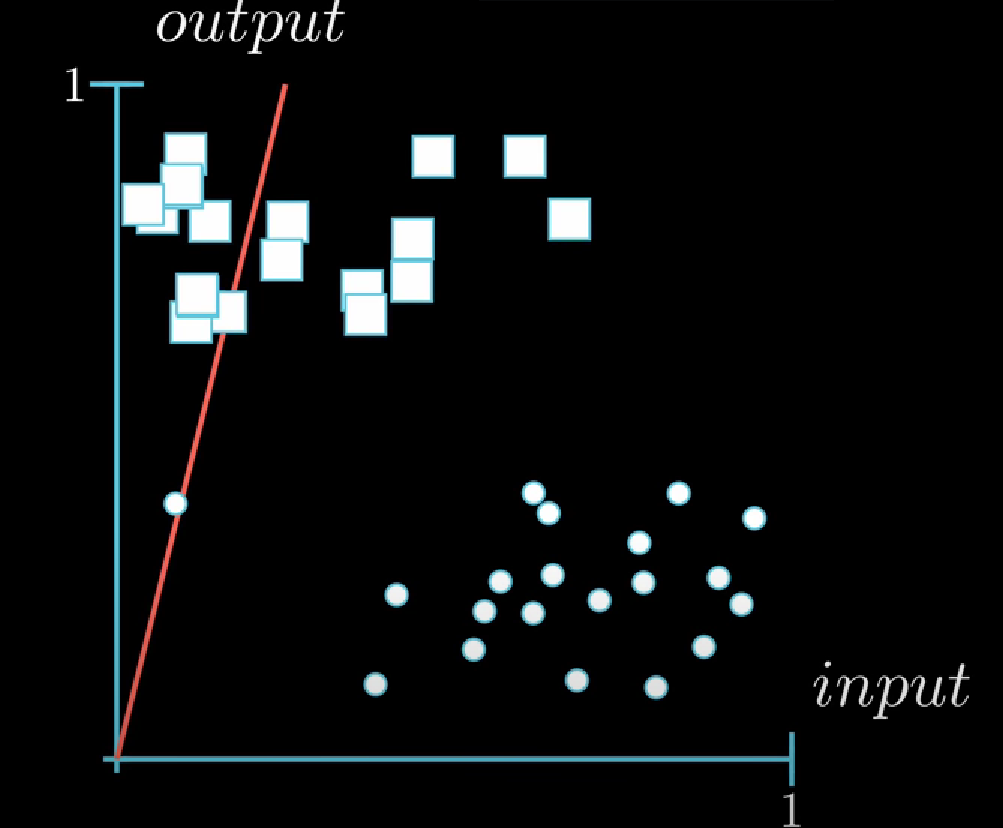

In [14]:
len(inputs)

4

In [15]:
#len(inputs)
len(layer1.weights)

4

# Implementing Activation Function( Relu ) 

In [16]:
class activation_relu():
    def __init__(self):
        pass
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)

In [17]:
activation1=activation_relu()

activation1.forward(layer2.output)
activation1.output

array([[0.17880476, 0.08642343]])

# Implementing Loss Calculating Function

### To calcualte loss we should have our true values

In [33]:
target_output=[0,1]
predicted_output=activation1.output[0]

In [36]:
class loss():
    def calculate_loss(self,output,y):
        self.loss=-(math.log(predicted_output[0]*target_output[0]+
             predicted_output[1]*target_output[1]))

NN_loss=loss()
NN_loss.calculate_loss(predicted_output,target_output)

print(NN_loss.loss)

2.448496421598154


# Implementing Back Propagation

In [40]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

input_size = 2  
output_size = 1 
learning_rate = 0.1
epochs = 100

weights = np.random.rand(input_size, output_size)
bias = np.random.rand(output_size)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])


for epoch in range(epochs):
    linear_output = np.dot(X, weights) + bias
    predictions = sigmoid(linear_output)

  
    loss = np.mean((y - predictions) ** 2)
    error = y - predictions
    d_predictions = error * sigmoid_derivative(predictions)

    
    d_weights = np.dot(X.T, d_predictions) / X.shape[0]
    d_bias = np.mean(d_predictions, axis=0)

    weights += learning_rate * d_weights
    bias += learning_rate * d_bias

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

Epoch 0, Loss: 0.2819
Epoch 10, Loss: 0.2794
Epoch 20, Loss: 0.2771
Epoch 30, Loss: 0.2749
Epoch 40, Loss: 0.2729
Epoch 50, Loss: 0.2710
Epoch 60, Loss: 0.2693
Epoch 70, Loss: 0.2676
Epoch 80, Loss: 0.2662
Epoch 90, Loss: 0.2648


# Seeing Predictions

In [41]:
def predict(inputs):
    linear_output = np.dot(inputs, weights) + bias
    return sigmoid(linear_output)


print("Test predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {predict(np.array([X[i]]))}, Actual: {y[i]}")


Test predictions:
Input: [0 0], Predicted: [[0.46627196]], Actual: [0]
Input: [0 1], Predicted: [[0.54547946]], Actual: [1]
Input: [1 0], Predicted: [[0.63535277]], Actual: [1]
Input: [1 1], Predicted: [[0.70532578]], Actual: [0]
